In [19]:
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
data = '../train/BlurCar1/'

In [3]:
with open(data + 'result_rect.txt') as f:
    results = list(map(lambda line: list(map(int, re.split(';|,| |\t', line.replace('\n', '')))), f.readlines()))

In [4]:
with open(data + 'groundtruth_rect.txt') as f:
    truths = list(map(lambda line: list(map(int, re.split(';|,| |\t', line.replace('\n', '')))), f.readlines()))

In [5]:
size = lambda obj: obj[2] * obj[3]

In [6]:
clash = lambda tar, obj: min(obj[2] + obj[0] - tar[0], tar[2])*min(obj[3] + obj[1] - tar[1], tar[3])/size(obj)

In [7]:
overlap = lambda tar, obj, rat: clash(tar, obj) >= rat

In [8]:
performance = lambda tar, obj, rat: [sum([overlap(t, o, r) for t, o in zip(tar, obj)])/len(truths) for r in rat]

In [9]:
perframe = lambda tar, obj, rat: [sum([overlap(t, o, r) for r in rat]) / len(rat) for t, o in zip(tar, obj)]

In [10]:
step = 0.001

In [11]:
x = np.arange(0 + step, 1 + step, step)

In [12]:
tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'GOTURN']

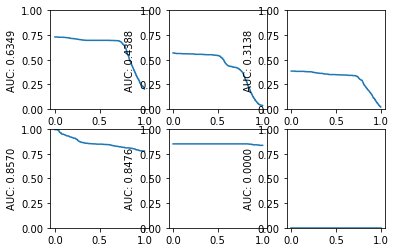

In [30]:
for i, tracker_type in enumerate(tracker_types):
    with open(data + 'opencv_rect_{}.txt'.format(tracker_type)) as f:
        result = list(map(lambda line: list(map(int, re.split(';|,| |\t', line.replace('\n', '')))), f.readlines()))
    perf = performance(result, truths, x)
    plt.subplot(2, 3, i + 1)
    plt.plot(x, perf)
    plt.ylim(0, 1)
    plt.ylabel('AUC: %.4f' % (sum(perf) / len(x)))
plt.show()

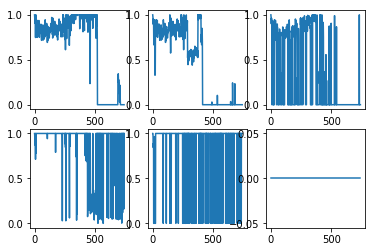

In [31]:
for i, tracker_type in enumerate(tracker_types):
    with open(data + 'opencv_rect_{}.txt'.format(tracker_type)) as f:
        result = list(map(lambda line: list(map(int, re.split(';|,| |\t', line.replace('\n', '')))), f.readlines()))
    perf = perframe(result, truths, x)
    perf = perf or [0]*len(truths)
    plt.subplot(2, 3, i + 1)
    plt.plot(range(len(truths)), perf)
plt.show()

In [13]:
perf_ml = performance(results, truths, x)

In [14]:
print ('AUC of ML', sum(perf_ml)/ len(x))

AUC of ML 0.912718328841


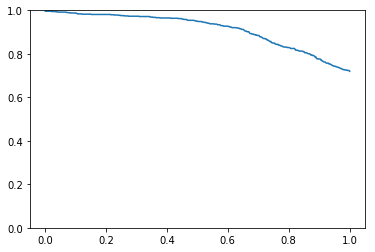

In [15]:
plt.plot(x, perf_ml);plt.ylim(0, 1);plt.show()

In [17]:
frame_ml = perframe(results, truths, x)

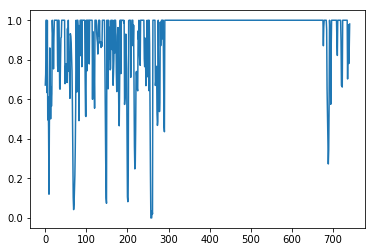

In [18]:
plt.plot(range(len(truths)), frame_ml); plt.show()